In [6]:
import numpy as np
import pandas as pd
from keras import models, layers

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import json
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
training_data_path = '../data/datasets/training_data_noisy_small_track_symetric_delayed_deviation.csv'
df = pd.read_csv(training_data_path)
print(f'{df.shape=}')
df.sample(5)

df.shape=(23760, 19)


,steering_angle,waypoint1_lat,waypoint1_lon,waypoint2_lat,waypoint2_lon,waypoint3_lat,waypoint3_lon,waypoint4_lat,waypoint4_lon,waypoint5_lat,waypoint5_lon,waypoint6_lat,waypoint6_lon,waypoint7_lat,waypoint7_lon,waypoint8_lat,waypoint8_lon,waypoint9_lat,waypoint9_lon
686,-0.200000,-1.470672,3.685066,-4.341914,5.457860,-7.690822,5.856551,-11.022789,5.209438,-14.003175,3.632617,-16.290699,1.125216,-18.223116,-1.671854,-20.044921,-4.537593,-21.634034,-7.543161
5736,0.300000,-3.075377,2.512184,-3.479636,5.892549,-3.479637,9.292514,-3.800741,12.669388,-4.496953,15.997126,-5.177904,19.328204,-5.858831,22.659262,-6.539792,25.990368,-6.793451,29.361011
7863,0.295991,-3.363464,-2.058040,-4.962804,-5.058362,-6.581667,-8.545187,-6.475797,-13.146665,-3.821382,-16.658645,-0.207269,-18.531476,3.336358,-19.364205,6.802936,-20.029894,10.375472,-20.235275
4858,-0.000000,1.835252,-4.362419,1.140620,-7.623620,-1.277783,-9.973872,-4.426986,-11.224303,-7.758906,-11.896048,-11.110046,-12.453264,-14.507509,-12.573793,-17.904293,-12.594984,-21.041593,-11.456949
20623,0.117728,-3.468125,-2.105038,-5.664417,-5.345546,-7.112299,-7.155992,-9.138362,-10.754526,-9.888058,-13.237768,-11.682398,-16.317171,-14.053924,-19.994543,-13.149325,-24.921866,-11.350550,-28.434010


In [8]:
X = df.drop(columns=['steering_angle'])
y = df['steering_angle']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19008, 18), (4752, 18), (19008,), (4752,))

In [9]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from datetime import datetime
from keras.losses import Huber
from keras.callbacks import ReduceLROnPlateau

model = Sequential([
    BatchNormalization(input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

name = 'neural_network'
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
checkpoint = ModelCheckpoint(f'../weights/best_{name}_{timestamp}.h5', monitor='val_loss', save_best_only=True, mode='min')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=5, min_lr=1e-5, verbose=1)

model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=['mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 18)               72        
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 256)               4864      
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 46,153
Trainable params: 46,117
Non-trainable params: 36
_________________________________________________

In [10]:
EPOCHS = 100
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=[checkpoint, reduce_lr],
    verbose=1
)

Epoch 1/100
594/594 [==============================] - 6s 9ms/step - loss: 0.0266 - mae: 0.1232 - val_loss: 0.0147 - val_mae: 0.0928 - lr: 0.0010
Epoch 2/100
594/594 [==============================] - 5s 9ms/step - loss: 0.0194 - mae: 0.1048 - val_loss: 0.0148 - val_mae: 0.0928 - lr: 0.0010
Epoch 3/100
594/594 [==============================] - 6s 9ms/step - loss: 0.0182 - mae: 0.1016 - val_loss: 0.0110 - val_mae: 0.0789 - lr: 0.0010
Epoch 4/100
594/594 [==============================] - 4s 6ms/step - loss: 0.0164 - mae: 0.0969 - val_loss: 0.0127 - val_mae: 0.0825 - lr: 0.0010
Epoch 5/100
594/594 [==============================] - 3s 5ms/step - loss: 0.0162 - mae: 0.0960 - val_loss: 0.0099 - val_mae: 0.0756 - lr: 0.0010
Epoch 6/100
594/594 [==============================] - 4s 7ms/step - loss: 0.0153 - mae: 0.0933 - val_loss: 0.0099 - val_mae: 0.0756 - lr: 0.0010
Epoch 7/100
594/594 [==============================] - 4s 7ms/step - loss: 0.0150 - mae: 0.0924 - val_loss: 0.0099 - val_mae

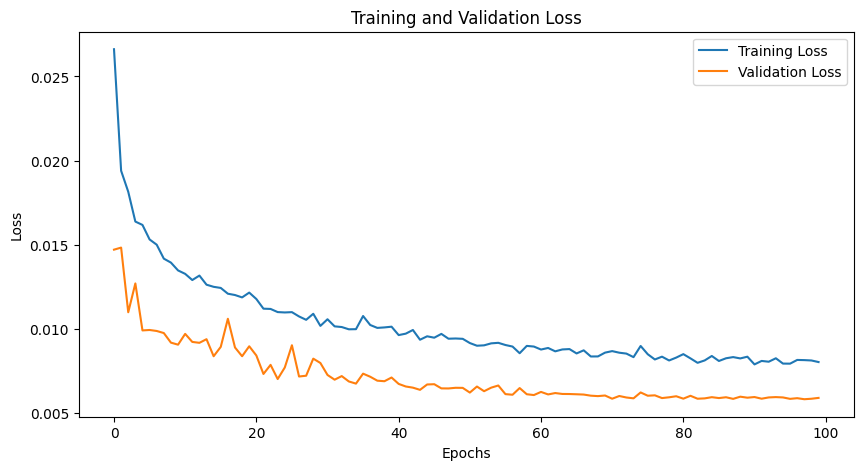

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

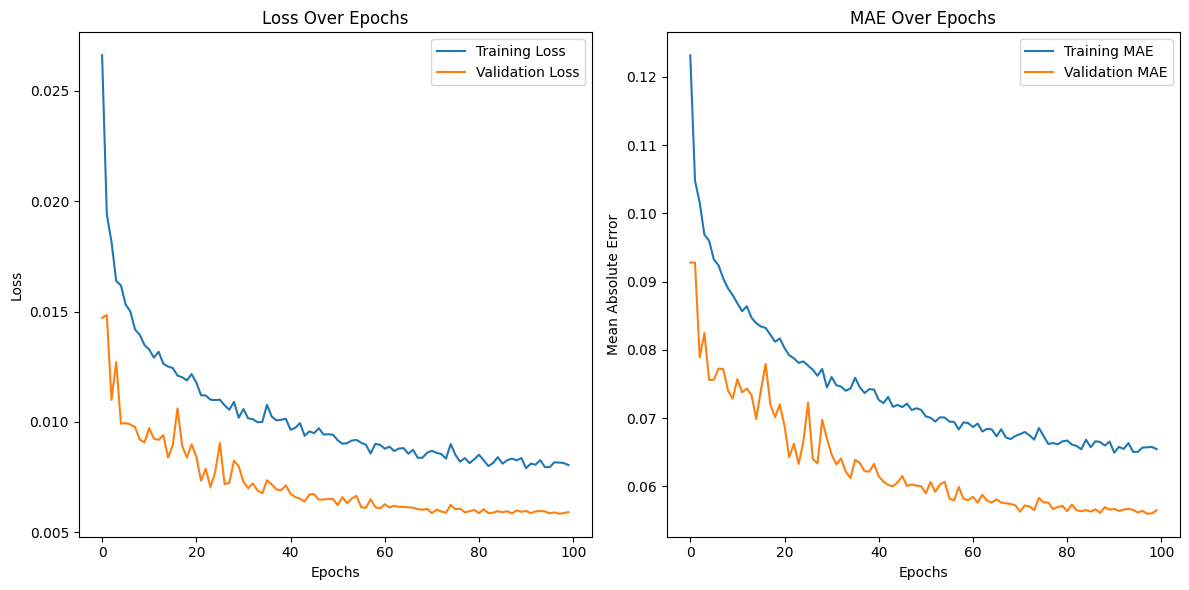

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('MAE Over Epochs')

plt.tight_layout()
plt.show()

In [13]:
model.load_weights(checkpoint.filepath)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", "R-squared (R2)"],
    "Value": [mse, mae, r2]
})

metrics_df

149/149 [==============================] - 1s 4ms/step


,Metric,Value
0,Mean Squared Error (MSE),0.005836
1,Mean Absolute Error (MAE),0.055991
2,R-squared (R2),0.892144


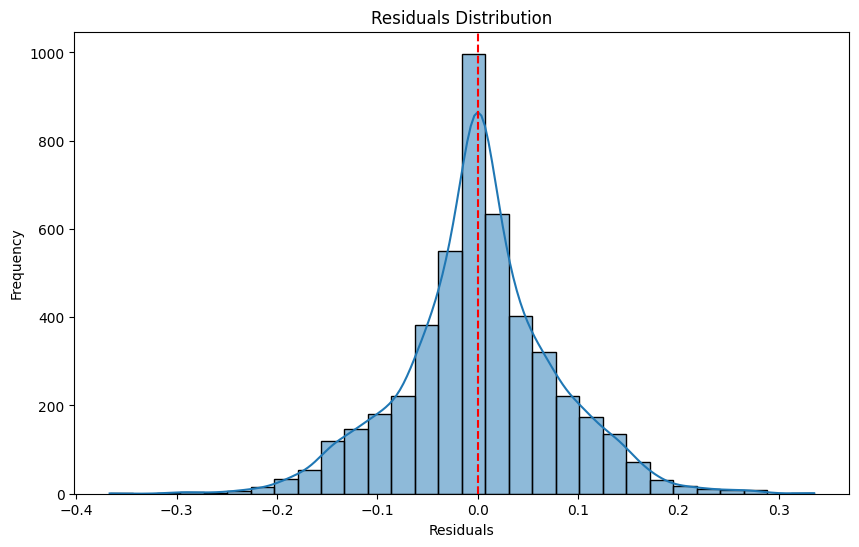

In [14]:
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

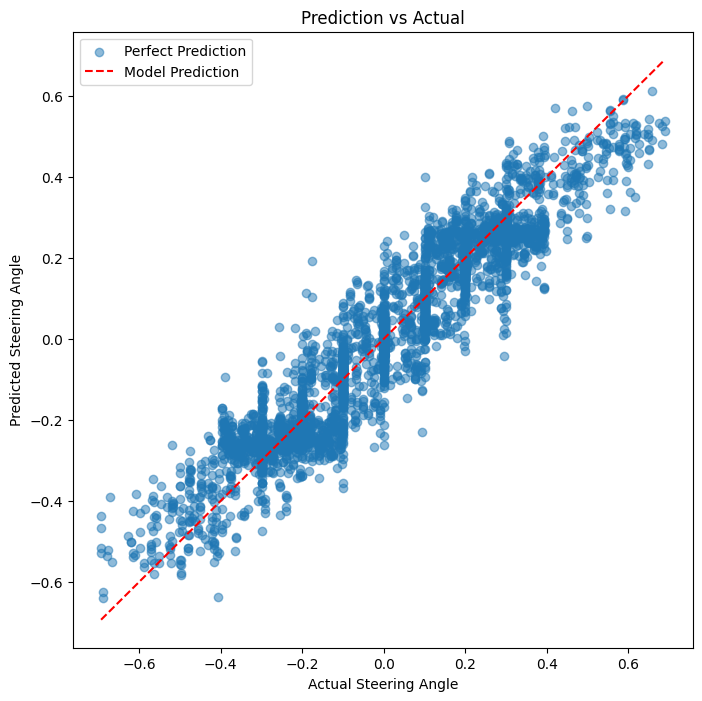

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Steering Angle')
plt.ylabel('Predicted Steering Angle')
plt.title('Prediction vs Actual')
plt.legend(['Perfect Prediction', 'Model Prediction'])
plt.show()

In [16]:
model_json = model.to_json()
with open(f'../models/{name}.json', 'w') as json_file:
    json.dump(json.loads(model_json), json_file, indent=4)

In [17]:
metadata = {
    "model_name": "nn_512_256_128_64",
    "model_path": f"../models/{name}.json",
    "training_data_path": training_data_path,
    "timestamp": timestamp,
    "input_shape": list(X_train.shape[1:]),
    "output_shape": [1],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": ["mae"],
    "training": {
        "epochs": len(history.history['loss']),
        "batch_size": 32,
        "best_model_path": checkpoint.filepath,
        "final_training_loss": history.history['loss'][-1],
        "final_validation_loss": history.history['val_loss'][-1]
    },
    "evaluation": {
        "mse": mse,
        "mae": mae,
        "r2": r2
    }
}

try:
    with open("metadata.jsonl", "r+") as f:
        lines = f.readlines()
        if json.dumps(metadata) + "\n" not in lines:
            f.write(json.dumps(metadata) + "\n")
except FileNotFoundError:
    with open("metadata.jsonl", "w") as f:
        f.write(json.dumps(metadata) + "\n")

In [18]:
with open("metadata.jsonl", "r") as f:
    lines = f.readlines()

print(json.dumps(json.loads(lines[-1]), indent=4))

{
    "model_name": "nn_512_256_128_64",
    "model_path": "../models/neural_network.json",
    "training_data_path": "../data/datasets/training_data_noisy_small_track_symetric_delayed_deviation.csv",
    "timestamp": "20250604_174337",
    "input_shape": [
        18
    ],
    "output_shape": [
        1
    ],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": [
        "mae"
    ],
    "training": {
        "epochs": 100,
        "batch_size": 32,
        "best_model_path": "../weights/best_neural_network_20250604_174337.h5",
        "final_training_loss": 0.0080421669408679,
        "final_validation_loss": 0.005914451088756323
    },
    "evaluation": {
        "mse": 0.005835538063905158,
        "mae": 0.055990537531769746,
        "r2": 0.8921435884746038
    }
}
